<a href="https://colab.research.google.com/github/LCarlosA/Analisede_Sentimentos/blob/main/OFICIAL_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Etapa 1: Importação de bibliotecas

In [ ]:
!python -m spacy download pt_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 26.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import numpy as np
import math
import re
import pandas as pd
from bs4 import BeautifulSoup
from google.colab import drive
import zipfile
import seaborn as sns
import spacy as sp
import string
import random
import matplotlib.pyplot as plt
from nltk import tokenize
import nltk


In [ ]:
nltk.download('rslp')

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


True

In [ ]:
from wordcloud import WordCloud

In [ ]:
from datetime import datetime

In [ ]:
# ATUALIZAÇÃO AGO-2024
# %tensorflow_version 2.x
import tensorflow as tf
tf.__version__

'2.17.0'

In [ ]:
from tensorflow.keras import layers
import tensorflow_datasets as tfds

# Dados de Treino:




## Etapa 2: Pré-Processamento de dados: Limpeza

In [ ]:
cols = ['text','label']

In [ ]:
train_data = pd.read_csv('emotions_pt.csv')

In [ ]:
train_data.shape

(248060, 2)

In [ ]:
train_data.head()

,text,label
0,eu me sinto terrivel sobre isso tambem porque ...,0
1,im sozinho eu me sinto horrivel,0
2,eu provavelmente mencionado isso antes mas eu ...,2
3,eu estava me sentindo um pouco fraca poucos di...,0
4,eu acredito que eu sou muito mais sensivel a o...,2


In [ ]:
train_data['label'].unique()

array([0, 2, 1])

<Axes: xlabel='label', ylabel='count'>

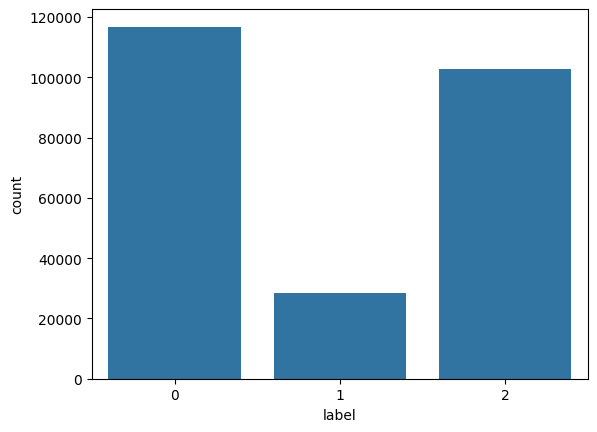

In [ ]:
sns.countplot( x = train_data['label'])

In [ ]:
train_data = train_data.drop(train_data[train_data['label'] == 1].index)

In [ ]:
train_data.replace(2,1, inplace = True)

<Axes: xlabel='label', ylabel='count'>

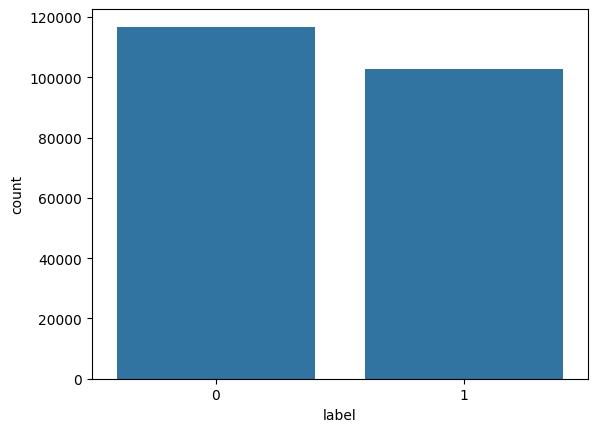

In [ ]:
sns.countplot( x = train_data['label'])

In [ ]:
data = train_data

In [ ]:
data.head()

,text,label
0,eu me sinto terrivel sobre isso tambem porque ...,0
1,im sozinho eu me sinto horrivel,0
2,eu provavelmente mencionado isso antes mas eu ...,1
3,eu estava me sentindo um pouco fraca poucos di...,0
4,eu acredito que eu sou muito mais sensivel a o...,1


In [ ]:
X = data.iloc[:, 0]

In [ ]:
y = data.iloc[:, 1]
print(y)

0         0
1         0
2         1
3         0
4         1
         ..
248052    0
248054    1
248055    0
248057    1
248058    1
Name: label, Length: 219584, dtype: int64


In [ ]:
print(X)

0         eu me sinto terrivel sobre isso tambem porque ...
1                           im sozinho eu me sinto horrivel
2         eu provavelmente mencionado isso antes mas eu ...
3         eu estava me sentindo um pouco fraca poucos di...
4         eu acredito que eu sou muito mais sensivel a o...
                                ...                        
248052             Um machista na plateia socorro #encontro
248054                   #MasterChefBR Fogaça sou sua fã...
248055              AI CARALHO TO MTO NERVOSA #MasterChefBR
248057    Mal começou a prévia do MasterChef e eu já tô ...
248058                             eu amei esse atendimento
Name: text, Length: 219584, dtype: object


In [ ]:
data_labels = y
print(y)

0         0
1         0
2         1
3         0
4         1
         ..
248052    0
248054    1
248055    0
248057    1
248058    1
Name: label, Length: 219584, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
X, _, y, _ = train_test_split(X, y, test_size = 0.85, stratify = y)

## Tratativa de linguagem:

In [ ]:
todas_palavras = ' '.join([texto for texto in data['text']])

In [ ]:
token_espaco = tokenize.WhitespaceTokenizer()

token_frase = token_espaco.tokenize(todas_palavras)
frequencia = nltk.FreqDist(token_frase)
frequencia

FreqDist({'eu': 296013, 'de': 168425, 'que': 166798, 'e': 153964, 'a': 104921, 'sinto': 91038, 'o': 89805, 'me': 87799, 'para': 73941, 'um': 61092, ...})

In [ ]:
def pareto(texto, coluna_texto, quantidade):
    todas_palavras = ' '.join([texto for texto in texto[coluna_texto]])
    token_frase = token_espaco.tokenize(todas_palavras)
    frequencia = nltk.FreqDist(token_frase)
    df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                                   "Frequência": list(frequencia.values())})
    df_frequencia = df_frequencia.nlargest(columns = "Frequência", n = quantidade)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequencia, x = "Palavra", y = "Frequência", color = 'gray')
    ax.set(ylabel = "Contagem")
    plt.show()

In [ ]:
def word_cloud(text, column_text):
      all_words = ' '.join([text for text in text[column_text]])

      word_cloud = WordCloud(width = 800, height = 400,
                              max_font_size = 110, collocations = False).generate(all_words)

      plt.figure(figsize = (10,7))
      plt.imshow(word_cloud, interpolation = 'bilinear')
      plt.axis('off')
      plt.title('Nuvem de palavras:')
      plt.show()

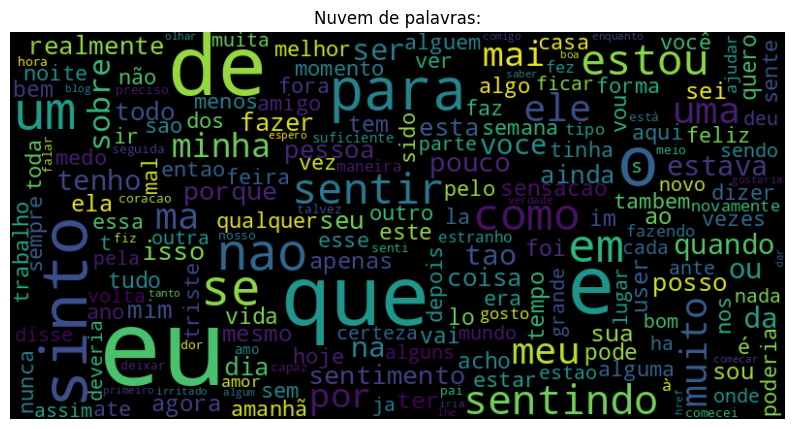

In [ ]:
word_cloud(data, 'text')

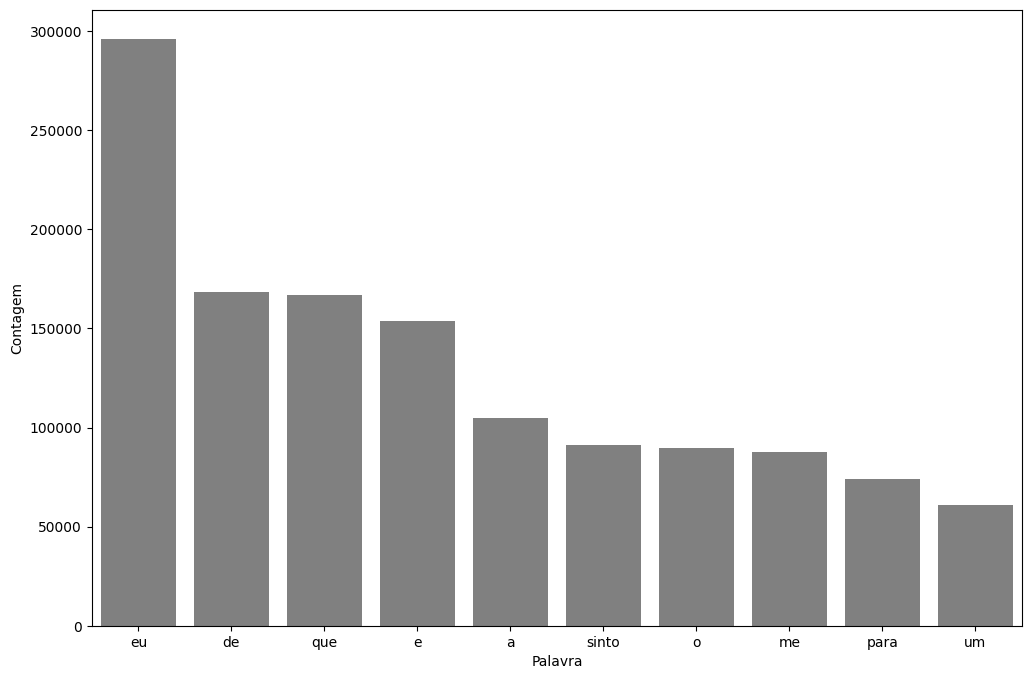

In [ ]:
pareto(data,'text',10)

In [ ]:
def clean_tweets(tweet):
  tweet = BeautifulSoup(tweet, 'lxml').get_text()
  tweet = re.sub(r"@[A-Za-z0-9]+", ' ', tweet)
  tweet = re.sub(r"https?://[A-Za-z0-9./]+", ' ', tweet)
  tweet = re.sub(r"[^a-zA-Z.!?]", ' ', tweet)
  tweet = re.sub(r" +", ' ', tweet)
  return tweet

In [ ]:
data['tratamento1'] = data['text'].apply(clean_tweets)

<ipython-input-30-77b6d4622bcb>:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  tweet = BeautifulSoup(tweet, 'lxml').get_text()


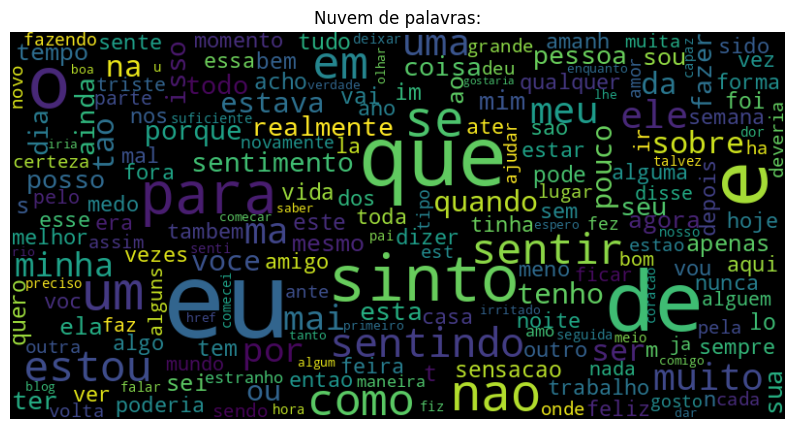

In [ ]:
word_cloud(data, 'tratamento1')

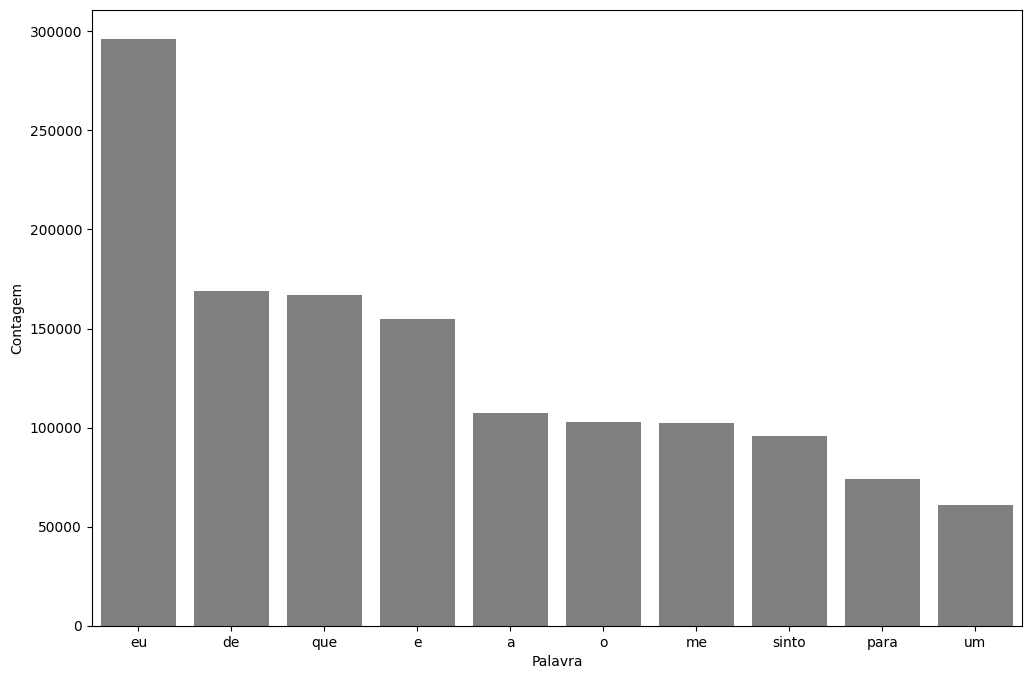

In [ ]:
pareto(data, "tratamento1", 10)

In [ ]:
nlp = sp.load('pt_core_news_sm')

In [ ]:
stop_words = sp.lang.pt.STOP_WORDS

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def clean_tweets2(tweet):

    tweet = tweet.lower()
    document = nlp(tweet)

    words = []

    for token in document:
        if token.text not in stop_words and token.text not in string.punctuation:
            words.append(token.text)

    # Juntar as palavras em uma string final
    cleaned_tweet = ' '.join(words)

    return cleaned_tweet

In [ ]:
text = 'hoje eu testei meus dados'
clean_tweets2(text)

'hoje testei dados'

In [ ]:
data['tratamento2'] = data['tratamento1'].apply(clean_tweets2)

In [ ]:
data.head()

,text,label,tratamento1,tratamento2
0,eu me sinto terrivel sobre isso tambem porque ...,0,eu me sinto terrivel sobre isso tambem porque ...,sinto terrivel tambem trabalho leva lo posicao...
1,im sozinho eu me sinto horrivel,0,im sozinho eu me sinto horrivel,im sozinho sinto horrivel
2,eu provavelmente mencionado isso antes mas eu ...,1,eu provavelmente mencionado isso antes mas eu ...,provavelmente mencionado realmente sinto orgul...
3,eu estava me sentindo um pouco fraca poucos di...,0,eu estava me sentindo um pouco fraca poucos di...,sentindo fraca poucos dias atras
4,eu acredito que eu sou muito mais sensivel a o...,1,eu acredito que eu sou muito mais sensivel a o...,acredito sensivel povos sentimentos tendem com...


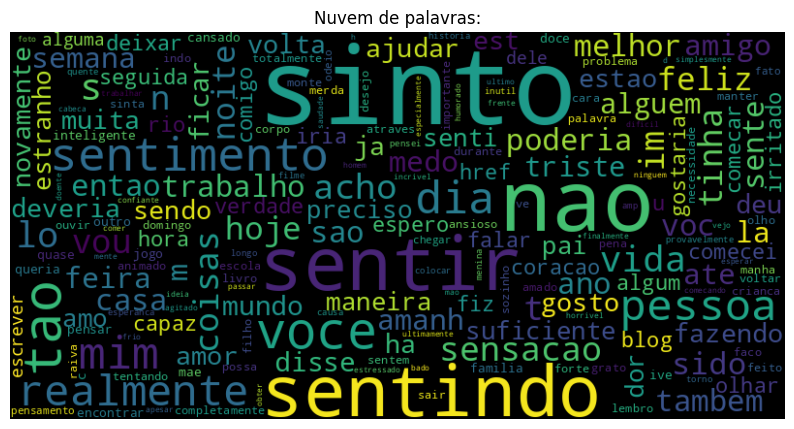

In [ ]:
word_cloud(data, 'tratamento2')

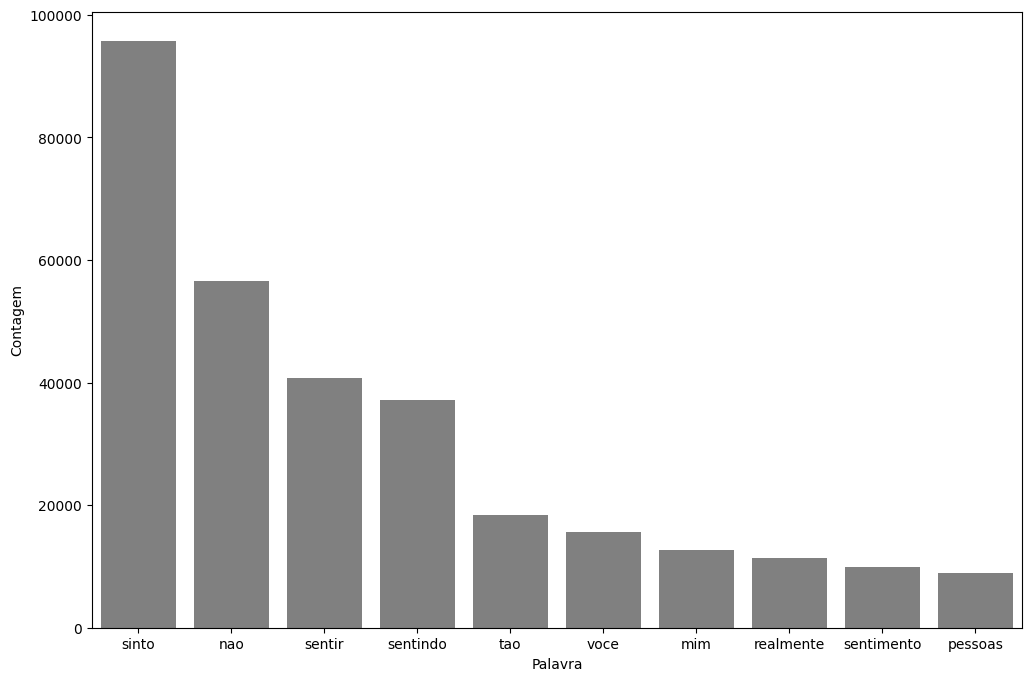

In [ ]:
pareto(data, "tratamento2", 10)

In [ ]:
stemmer = nltk.RSLPStemmer()


frase_processada = list()
for opiniao in data['tratamento2']:
    nova_frase = list()
    palavras_texto = token_espaco.tokenize(opiniao)
    for palavra in palavras_texto:
        nova_frase.append(stemmer.stem(palavra))
    frase_processada.append(' '.join(nova_frase))
data['tratamento3'] = frase_processada

In [ ]:
data.head()

,text,label,tratamento1,tratamento2,tratamento3
0,eu me sinto terrivel sobre isso tambem porque ...,0,eu me sinto terrivel sobre isso tambem porque ...,sinto terrivel tambem trabalho leva lo posicao...,sint terri tamb trabalh lev lo posica sucess t...
1,im sozinho eu me sinto horrivel,0,im sozinho eu me sinto horrivel,im sozinho sinto horrivel,im so sint horri
2,eu provavelmente mencionado isso antes mas eu ...,1,eu provavelmente mencionado isso antes mas eu ...,provavelmente mencionado realmente sinto orgul...,prova mencion real sint orgulh mim mesm real m...
3,eu estava me sentindo um pouco fraca poucos di...,0,eu estava me sentindo um pouco fraca poucos di...,sentindo fraca poucos dias atras,sent frac pouc dia atr
4,eu acredito que eu sou muito mais sensivel a o...,1,eu acredito que eu sou muito mais sensivel a o...,acredito sensivel povos sentimentos tendem com...,acredit sensi pov sent tend compass


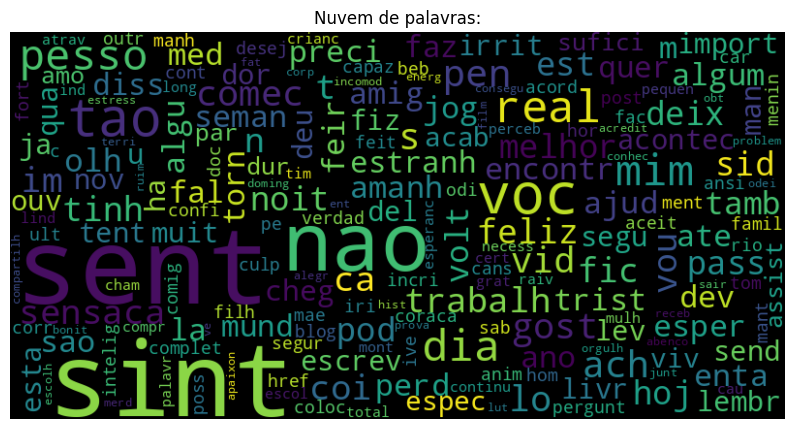

In [ ]:
word_cloud(data, 'tratamento3')

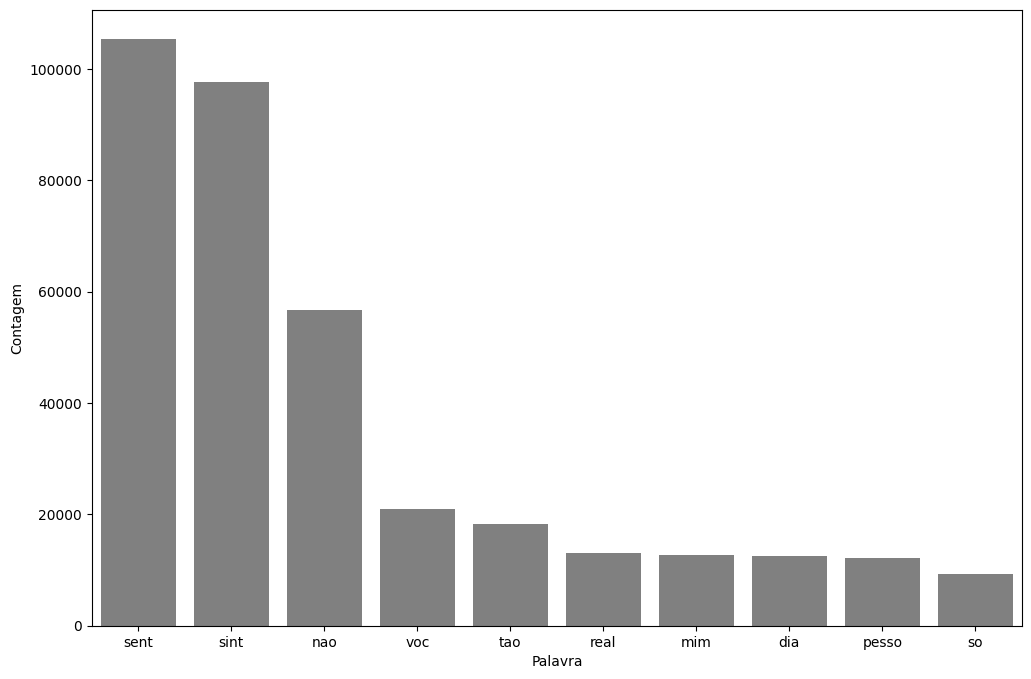

In [ ]:
pareto(data, "tratamento3", 10)

In [ ]:
data.drop(['text','tratamento1','tratamento2'], axis = 1, inplace = True)

In [ ]:
data.head()

,label,tratamento3
0,0,sint terri tamb trabalh lev lo posica sucess t...
1,0,im so sint horri
2,1,prova mencion real sint orgulh mim mesm real m...
3,0,sent frac pouc dia atr
4,1,acredit sensi pov sent tend compass


In [ ]:
data_clean = data['tratamento3']

## Tokenização

In [ ]:
2**16

65536

In [ ]:
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(data_clean, target_vocab_size = 2**16)

In [ ]:
tokenizer.vocab_size

54930

In [ ]:
print(tokenizer.subwords)

['sent_', 'sint_', 'nao_', 'voc_', 'tao_', 'real_', 'pesso_', 'dia_', 'mim_', 'ach_', 'so_', 's_', 'gost_', 'comec_', 'im_', 'pens_', 'sensaca_', 't_', 'fic_', 'tinh_', 'cois_', 'vou_', 'lo_', 'n_', 'trabalh_', 'vid_', 'cas_', 'deix_', 'am_', 'pod_', 'est_', 'sid_', 'feliz_', 'tamb_', 'pass_', 'olh_', 'enta_', 'dev_', 'volt_', 'esper_', 'noit_', 'precis_', 'sao_', 'melhor_', 'hoj_', 'ate_', 'perd_', 'ano_', 'm_', 'ajud_', 'amanh_', 'algum_', 'algu_', 'med_', 'jog_', 'mim', 'amig_', 'torn_', 'encontr_', 'seman_', 'trist_', 'faz_', 'fal_', 'la_', 'quer_', 'feir_', 'diss_', 'send_', 'lembr_', 'esta_', 'cheg_', 'muit_', 'tent_', 'estranh_', 'mund_', 'ha_', 'escrev_', 'segu_', 'livr_', 'com_', 'ja_', 'import_', 'ouv_', 'lev_', 'deu_', 'acab_', 'fiz_', 'dor_', 'http_', 'man_', 'dur_', 'assist_', 'amo_', 'complet_', 'coloc_', 'tom_', 'irrit_', 'capaz_', 'espec_', 'acord_', 'par_', 'iri_', 'sufici_', 'viv_', 'ult_', 'href_', 'acontec_', 'mant_', 'dia', 'post_', 'hor_', 'desej_', 'pergunt_', 'd

In [ ]:
ids = tokenizer.encode('eu sou feliz')
print(ids)

[9198, 31175, 347]


In [ ]:
text = tokenizer.decode(ids)
print(text)

eu sou feliz


In [ ]:
data_inputs = [tokenizer.encode(sentence) for sentence in data_clean]

In [ ]:
for _ in range(10):
  print(data_inputs[random.randint(0, len(data_inputs) -1 )])

[2, 213, 2432, 869]
[2, 39, 26, 141, 3, 40, 184, 6734]
[15, 3, 864, 170, 11, 146, 2, 2, 1805]
[102, 59, 23, 258, 908, 182, 1, 1867]
[2, 50, 156, 191, 8333, 629, 348, 4625, 547, 1102, 293]
[77, 544, 1, 484, 1, 382]
[2, 329, 22, 234, 115, 304, 585, 3, 279, 2653]
[1425, 1, 151, 126, 213, 3, 7, 4204, 11, 10358, 33, 11, 6, 20, 163, 57, 126, 588, 3, 80, 1004, 1004, 3308]
[2, 785, 4389]
[2, 526, 95, 50, 53, 336, 727]


## Padding

In [ ]:
max_len = max([len(sentence) for sentence in data_inputs])
max_len

46

In [ ]:
data_inputs = tf.keras.preprocessing.sequence.pad_sequences(data_inputs,
                                                            value = 0,
                                                            padding = 'post',
                                                            maxlen=max_len)

In [ ]:
for _ in range(10):
  print(data_inputs[random.randint(0, len(data_inputs) - 1)])

[  11   20    1    5   64   64  126 1124    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0]
[ 244    9  259   41   66  185   44  543  852   11  549    1  827 3248
 1251    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0]
[   1 3140  932 1401    2   97  873    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0]
[   2  121  501   68   15 1827    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0]
[1246  299  256 1082   19   13   14    1  492   87   44 3198

### Divisão entre treino e teste

In [ ]:
train_inputs, test_inputs, train_labels, test_labels = train_test_split(data_inputs,
                                                                        data_labels,
                                                                        test_size = 0.3,
                                                                        stratify = data_labels)

In [ ]:
test_labels.to_csv('test_labels.csv', index = False)

In [ ]:
train_labels.to_csv('train_labels.csv', index = False)

In [ ]:
np.savetxt('train_inputs.csv', train_inputs)

In [ ]:
np.savetxt('test_inputs.csv', test_inputs)

In [ ]:
data.to_csv('data.csv', index = False)

In [ ]:
data.head()

,label,tratamento3
0,0,sint terri tamb trabalh lev lo posica sucess t...
1,0,im so sint horri
2,1,prova mencion real sint orgulh mim mesm real m...
3,0,sent frac pouc dia atr
4,1,acredit sensi pov sent tend compass


In [ ]:
train_labels.shape

(153708,)

In [ ]:
test_labels.shape

(65876,)

In [ ]:
train_inputs.shape

(153708, 46)

In [ ]:
test_inputs.shape

(65876, 46)

In [ ]:
len(set(train_labels))

2

## Etapa 2: Pré-Processamento de dados - Teste

In [ ]:
test_data = pd.read_csv('BaseTweets.csv')
test_data.drop_duplicates(inplace = True)

In [ ]:
test_data.head()

,text,createdAt,retweetCount,viewCount
0,🚨URGENTE - Milei oficializa plano de privatiza...,Thu Dec 28 16:42:20 +0000 2023,340,15635.0
1,"""O mercado não vai gostar da medida adotada pe...",Tue May 16 14:28:22 +0000 2023,2263,1709586.0
2,Jean Paul Prates tá se saindo melhor que a enc...,Sun Dec 31 10:28:45 +0000 2023,889,101678.0
3,Pós eleições a Petrobras #PETR4 fez um padrão ...,Thu Nov 10 15:44:22 +0000 2022,2010,NaN
4,Distribuição de dividendos não é sangria.\r\n\...,Thu Nov 03 12:55:50 +0000 2022,643,NaN


In [ ]:
test_data.rename(columns = {'text':'resenha'}, inplace = True)
test_data.rename(columns = {'createdAt':'datapublicacao'}, inplace = True)
test_data.rename(columns = {'retweetatCount':'retweets'}, inplace = True)
test_data.rename(columns = {'viewCount':'views'}, inplace = True)

In [ ]:
test_data['views'].fillna(test_data['views'].mean(), inplace = True)
test_data['views'] = test_data['views'].astype(int)

<ipython-input-71-0b788de7d611>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['views'].fillna(test_data['views'].mean(), inplace = True)


In [ ]:
test_data

,resenha,datapublicacao,retweetCount,views
0,🚨URGENTE - Milei oficializa plano de privatiza...,Thu Dec 28 16:42:20 +0000 2023,340,15635
1,"""O mercado não vai gostar da medida adotada pe...",Tue May 16 14:28:22 +0000 2023,2263,1709586
2,Jean Paul Prates tá se saindo melhor que a enc...,Sun Dec 31 10:28:45 +0000 2023,889,101678
3,Pós eleições a Petrobras #PETR4 fez um padrão ...,Thu Nov 10 15:44:22 +0000 2022,2010,228042
4,Distribuição de dividendos não é sangria.\r\n\...,Thu Nov 03 12:55:50 +0000 2022,643,228042
...,...,...,...,...
630,INFORMAÇÕES IMPORTANTES SOBRE O CONCURSO DO BA...,Wed Feb 15 14:36:07 +0000 2023,1890,1993086
637,Fazuelli que passa 🤡💩🫠\r\n\r\nBanco do Brasil ...,Wed Aug 23 16:55:57 +0000 2023,2019,154127
638,Oferecimento ao patrocinador: Banco do Brasil!...,Thu Sep 07 13:05:35 +0000 2023,650,30495
640,"Conhecido como 'o menino da Dilma', a quem, se...",Fri Dec 01 14:02:17 +0000 2023,395,15932


In [ ]:
  test_data['datapublicacao'] = pd.to_datetime(test_data['datapublicacao'], format = '%a %b %d %H:%M:%S %z %Y')
  test_data = test_data.sort_values('datapublicacao')
  test_data['datapublicacao'] = test_data['datapublicacao'].dt.strftime('%d/%m/%Y')

In [ ]:
test_data

In [ ]:
data_clean = [clean_tweets2(clean_tweets(tweet)) for tweet in X]

In [ ]:
for _ in range(10):
  print(data_clean[random.randint(0, len(data_clean) - 1)])